# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.001#17#0.125#0.12699485911198283#0.04
run = 1

twod=true
zeroformat=false

## grid
Agrid=0.35
kgrid=0.7
mgrid=0.5#0.55
fgrid=5

5

In [2]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [3]:
global compactified=true
global loggrid=true

global bisection=true

true

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [5]:
iter=1

1

In [6]:
print(N)

400.0

In [7]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [8]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [9]:

if loggrid==true
    ori=(tan(-mgrid/Agrid)/fgrid+kgrid)#0.0#Float128(0.0)#0.0;
    Xf=(tan((1-mgrid)/Agrid)/fgrid+kgrid)
else
    ori=0.0
    Xf=1.0
end

dx=(Xf-ori)/N

initX1 = nothing

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
#initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX1)+6;
println("step size is  ", dx)
println("the time step is ", dt)

initX=[ori-3*dx; ori-2*dx; ori-dx; collect(initX1); Xf+dx; Xf+2*dx; Xf+3*dx];

step size is  0.006983645350820511
the time step is 0.00025


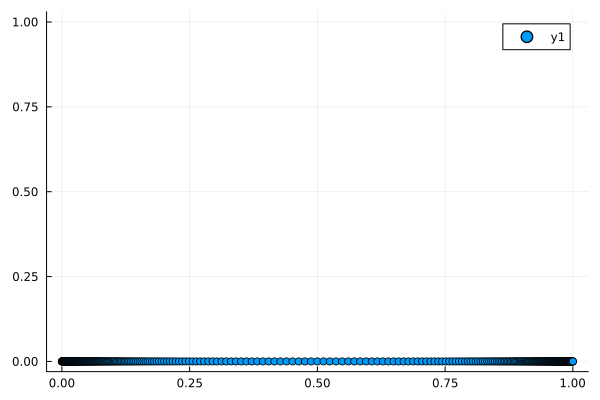

In [10]:
using Plots
scatter(inverse.(initX1), zeros(length(initX1)))#, ylim=[-1,1],xlim=[0,1])

# Initial data of m β Ψ and Ψ,x

In [11]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7
sigma=0.3


#PSI,R FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [12]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [13]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

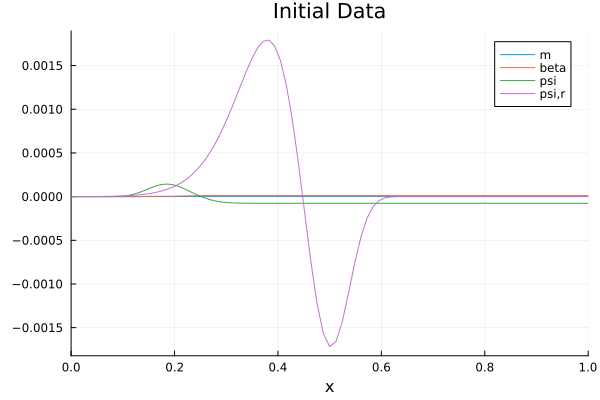

In [14]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [15]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [16]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, state_array[:,1:5],res,"w")

In [17]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [18]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

0.5454313782148195


In [19]:
using Base.Threads
Threads.nthreads()

4

In [20]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [ ]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.00013635784455370422, t=0.013635784455370451 speed is 0.45241198591888937, dx/dt=51.215574532420966
 monitor ratio is 1.5078159644305618e-5

iteration 200 dt is 0.0001363578445537039, t=0.02727156891074094 speed is 0.4524119859188905, dx/dt=51.21557453242109
 monitor ratio is 1.5173768937876014e-5

iteration 300 dt is 0.00013635784455370346, t=0.040907353366111184 speed is 0.4524119859188919, dx/dt=51.21557453242125
 monitor ratio is 1.5262092088331844e-5

iteration 400 dt is 0.00013635784455370286, t=0.054543137821481326 speed is 0.4524119859188939, dx/dt=51.21557453242148
 monitor ratio is 1.5343459152479318e-5

iteration 500 dt is 0.00013635784455370202, t=0.06817892227685175 speed is 0.45241198591889664, dx/dt=51.21557453242179
 monitor ratio is 1.54182101410697e-5

iteration 600 dt is 0.00013635784455370094, t=0.08181470673222202 speed is 0.45241198591890025, dx/dt=51.2155745324222
 monitor ratio is 1.5486691517368545e-5

iteration 700 dt is 0.0001363578445

 monitor ratio is 2.129322384758617e-5

iteration 5300 dt is 0.00013635784453882617, t=0.7226965761194769 speed is 0.45241198596825216, dx/dt=51.215574538009115
 monitor ratio is 2.1497883836552303e-5

iteration 5400 dt is 0.00013635784453795005, t=0.736332360573315 speed is 0.452411985971159, dx/dt=51.21557453833818
 monitor ratio is 2.168241365027112e-5

iteration 5500 dt is 0.00013635784453711042, t=0.7499681450270672 speed is 0.4524119859739447, dx/dt=51.21557453865354
 monitor ratio is 2.1846713272200368e-5

iteration 5600 dt is 0.00013635784453632066, t=0.763603929480738 speed is 0.452411985976565, dx/dt=51.21557453895018
 monitor ratio is 2.1990697938371926e-5

iteration 5700 dt is 0.00013635784453559452, t=0.7772397139343326 speed is 0.4524119859789743, dx/dt=51.215574539222914
 monitor ratio is 2.2147197721733063e-5

iteration 5800 dt is 0.00013635784453494595, t=0.7908754983878585 speed is 0.45241198598112614, dx/dt=51.215574539466516
 monitor ratio is 2.234612200196031e-5

i

 monitor ratio is 1.2577615611461367e-5

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio18400.csv" is not a valid file or doesn't exist

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

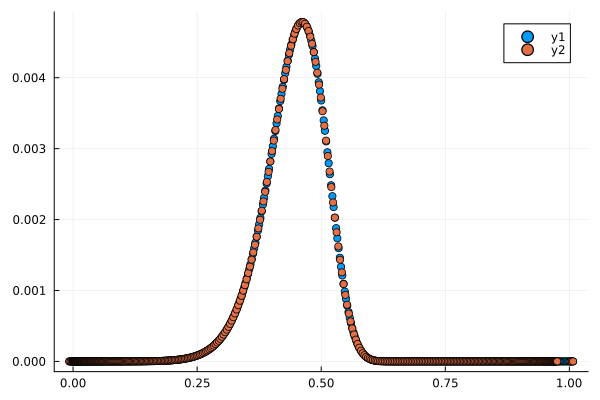

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

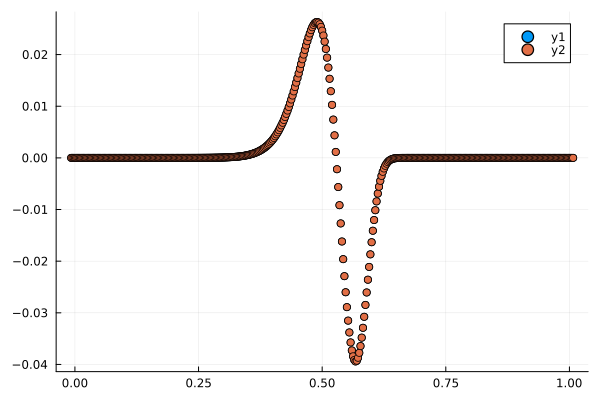

In [417]:
scatter([x1,x1],[y1,y2])